# What is the structure of a GBT FITS file?


In [9]:
# Typical imports here
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as c

In [10]:
from astropy.io import fits
from astropy.table import Table,join,vstack

In [11]:
import pickle
from pathlib import Path
homedir = str(Path.home())

# Test using AMIGA dataset

In [12]:
fl = homedir+'/Dropbox/GBT-AMIGA/Data-Reduced/AMIGA-GBT.fits'

In [13]:
a=fits.open(fl)
np.shape(a)

(50,)

There are 50 extensions, each potentially holding multiple sight lines.

In [14]:
a[0:5].info()

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   ()      
  1  SINGLE DISH    1 BinTableHDU    185   2R x 83C   [32A, D, 22A, D, D, D, 711E, 16A, 6A, 8A, D, D, D, 4A, D, 4A, D, I, 32A, 32A, J, 32A, 16A, D, 8A, D, D, D, D, D, D, D, D, D, D, D, D, D, 8A, D, D, 8A, I, I, D, D, I, A, I, I, 16A, 16A, J, J, 22A, D, D, I, A, D, D, E, D, D, D, D, A, A, 8A, E, E, 16A, 32A, 32A, 32A, D, D, D, I, I, I, J, J]   
  2  SINGLE DISH    1 BinTableHDU    185   1R x 83C   [32A, D, 22A, D, D, D, 1024E, 16A, 6A, 8A, D, D, D, 4A, D, 4A, D, I, 32A, 32A, J, 32A, 16A, D, 8A, D, D, D, D, D, D, D, D, D, D, D, D, D, 8A, D, D, 8A, I, I, D, D, I, A, I, I, 16A, 16A, J, J, 22A, D, D, I, A, D, D, E, D, D, D, D, A, A, 8A, E, E, 16A, 32A, 32A, 32A, D, D, D, I, I, I, J, J]   
  3  SINGLE DISH    1 BinTableHDU    185   3R x 83C   [32A, D, 22A, D, D, D, 711E, 16A, 6A, 8A, D, D, D, 4A, D, 4A, D, I, 32A, 32A, J, 32A, 16A, 

## Each extension contains an extensive binary table housing all the data.

Each extension itself has multiple objects?

In [15]:
x1 = a[1]
x2 = a[2]
x3 = a[48]
x1.columns

ColDefs(
    name = 'OBJECT'; format = '32A'
    name = 'BANDWID'; format = 'D'
    name = 'DATE-OBS'; format = '22A'
    name = 'DURATION'; format = 'D'
    name = 'EXPOSURE'; format = 'D'
    name = 'TSYS'; format = 'D'
    name = 'DATA'; format = '711E'
    name = 'TDIM7'; format = '16A'
    name = 'TUNIT7'; format = '6A'
    name = 'CTYPE1'; format = '8A'
    name = 'CRVAL1'; format = 'D'
    name = 'CRPIX1'; format = 'D'
    name = 'CDELT1'; format = 'D'
    name = 'CTYPE2'; format = '4A'
    name = 'CRVAL2'; format = 'D'
    name = 'CTYPE3'; format = '4A'
    name = 'CRVAL3'; format = 'D'
    name = 'CRVAL4'; format = 'I'
    name = 'OBSERVER'; format = '32A'
    name = 'OBSID'; format = '32A'
    name = 'SCAN'; format = 'J'
    name = 'OBSMODE'; format = '32A'
    name = 'FRONTEND'; format = '16A'
    name = 'TCAL'; format = 'D'
    name = 'VELDEF'; format = '8A'
    name = 'VFRAME'; format = 'D'
    name = 'RVSYS'; format = 'D'
    name = 'OBSFREQ'; format = 'D'
    name = 'LST

#### Each extension is its own table, containing multiple targets

In [16]:
all_obj = []
for j in np.arange(1,np.size(a)):
    print("{0}: {1}".format(j,a[j].data['object']))
    all_obj.append(a[j].data['object'].tolist())

1: ['M31Halo_105_025' 'M31Halo_285_025']
2: ['RXJ0048.3+3941']
3: ['M31Halo_075_025' 'M31Halo_000_025' 'SDSSJ003125.36+403222.0']
4: ['HS0033+4300']
5: ['LAMOST005016.63+391639.0' 'LAMOST003432.52+391836.1'
 'LAMOST004706.09+384843.9' 'NPM1G+43.0016' 'M31Halo_075_040'
 'M31Halo_145_040' 'GALEXJ002912+433216' 'M31Halo_285_045'
 'M31Halo_200_045' 'M31Halo_000_045' 'M31Halo_105_045']
6: ['HS0058+4213']
7: ['RXSJ0043.6+372521']
8: ['SDSSJ002827.06+380942.0']
9: ['ZW535.012']
10: ['UVQSJ001903.85+423809.0' 'SDSSJ005547.99+451410.9']
11: ['Q0030+3700']
12: ['LAMOST005846.82+365514.2']
13: ['BLANK']
14: ['MS0108.4+3859']
15: ['RXSJ005050.6+353645']
16: ['GALEXJ001036+400314']
17: ['2E0111.0+3851']
18: ['M31Halo_000_085' 'M31Halo_210_085' 'M31Halo_030_085' 'M31Halo_330_085'
 'LAMOST011724.84+435335.9' 'MRK971']
19: ['IRAS00040+4325' 'RXSJ011848.2+383626']
20: ['HS0010+3611' 'SDSSJ012400.59+410709.7']
21: ['RXJ0117.7+3637' 'SDSSJ001847.44+341209.5']
22: ['SDSSJ012048.92+464344.9' 'SDSSJ013115.6

## We can create an astropy table from the input data:

In [17]:
Table(x2.data)

OBJECT,BANDWID,DATE-OBS,DURATION,EXPOSURE,TSYS,DATA [1024],TDIM7,TUNIT7,CTYPE1,CRVAL1,CRPIX1,CDELT1,CTYPE2,CRVAL2,CTYPE3,CRVAL3,CRVAL4,OBSERVER,OBSID,SCAN,OBSMODE,FRONTEND,TCAL,VELDEF,VFRAME,RVSYS,OBSFREQ,LST,AZIMUTH,ELEVATIO,TAMBIENT,PRESSURE,HUMIDITY,RESTFREQ,DOPFREQ,FREQRES,EQUINOX,RADESYS,TRGTLONG,TRGTLAT,SAMPLER,FEED,SRFEED,FEEDXOFF,FEEDEOFF,SUBREF_STATE,SIDEBAND,PROCSEQN,PROCSIZE,PROCSCAN,PROCTYPE,LASTON,LASTOFF,TIMESTAMP,QD_XEL,QD_EL,QD_BAD,QD_METHOD,VELOCITY,FOFFREF1,ZEROCHAN,ADCSAMPF,VSPDELT,VSPRVAL,VSPRPIX,SIG,CAL,CALTYPE,TWARM,TCOLD,CALPOSITION,BACKEND,PROJID,TELESCOP,SITELONG,SITELAT,SITEELEV,IFNUM,PLNUM,FDNUM,INT,NSAVE
str32,float64,str22,float64,float64,float64,float32,str16,str6,str8,float64,float64,float64,str4,float64,str4,float64,int16,str32,str32,int32,str32,str16,float64,str8,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str8,float64,float64,str8,int16,int16,float64,float64,int16,str1,int16,int16,str16,str16,int32,int32,str22,float64,float64,int16,str1,float64,float64,float32,float64,float64,float64,float64,str1,str1,str8,float32,float32,str16,str32,str32,str32,float64,float64,float64,int16,int16,int16,int32,int32
RXJ0048.3+3941,23437500.0,2014-09-26T03:27:43.51,9332.431640625,8963.7548828125,18.829669952392578,0.110209204 .. -0.14185081,"(1024,1,1,1)",Ta*,FREQ-OBS,1421608409.0,512.875,-22888.18359375,RA,12.080509703857576,DEC,39.687289029721384,-5,D.J. Pisano,unknown,73,Track:NONE:TPWCAL,Rcvr1_2,1.809999942779541,OPTI-BAR,-10629.59826927864,0.0,1421608409.0,80871.83511952717,75.94262088926313,62.73957852304777,285.45001220703125,699.9802421563649,0.9779999852180481,1420405752.0,1420405752.0,22799.124558394866,2000.0,FK5,12.07916666666667,39.68638888888889,A1_0,1,0,0.0,0.0,1,L,1,1,ON,SIMPLE,0,0,2014_09_26_03:27:43,nan,nan,-1,,-243000.0,0.0,nan,nan,nan,nan,nan,T,F,LOW,nan,nan,Unknown,VEGAS,AGBT14B_436_01,NRAO_GBT,-79.83983,38.43312,824.595,0,1,0,0,-1


# Create a spectrum

In [18]:
b=x2.data[0]
nu0=b['RESTFREQ']
nu = ((np.arange(np.size(b['DATA']))+1)-b['CRPIX1'])*b['CDELT1'] + b['CRVAL1']

In [19]:
vel = (nu0-nu)/nu0 * c.c.to('km/s')
Ta = b['DATA']

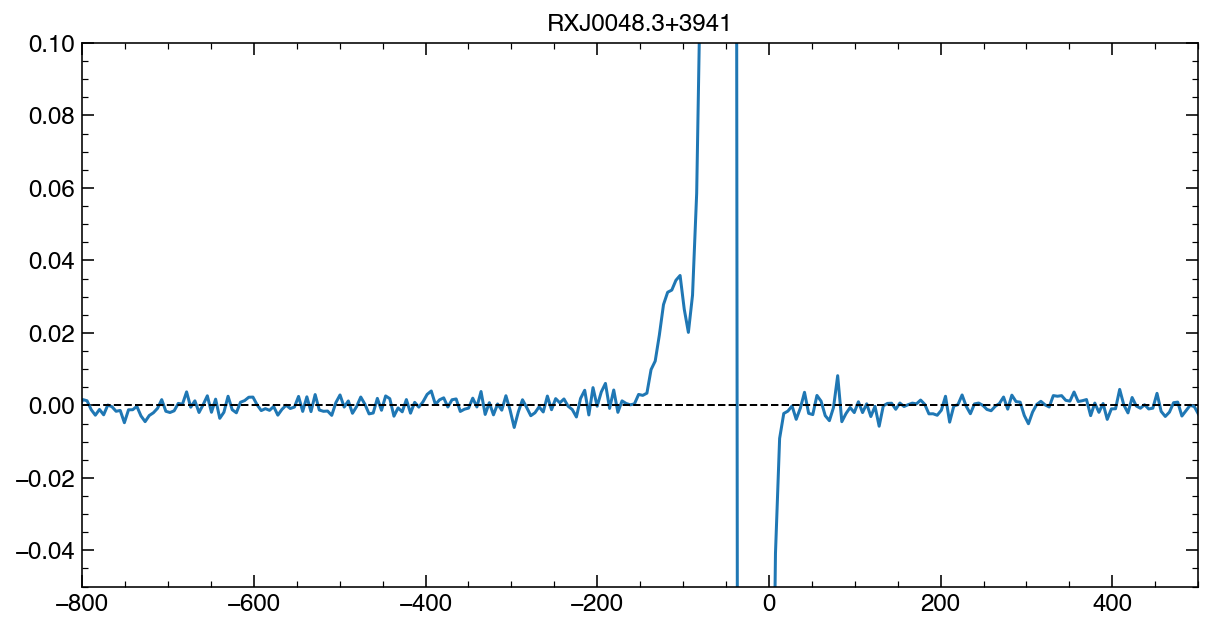

In [20]:
plt.figure(figsize=(10,5))
plt.plot(vel,Ta)
plt.xlim(-800,500)
plt.ylim(-0.05,0.1)
plt.axhline(0.,linestyle='--',color='k',linewidth=1)
plt.title(b['OBJECT']);

# Find a specific object:

In [13]:
fnd_obj = 'RBS2055'
for j in np.arange(1,np.size(a)):
    xxx = a[j].data
    gd=(xxx['OBJECT'] == fnd_obj)
    if gd.sum() > 0:
        out = xxx[gd]        

In [14]:
b=out.copy()

In [15]:
b.columns

ColDefs(
    name = 'OBJECT'; format = '32A'
    name = 'BANDWID'; format = 'D'
    name = 'DATE-OBS'; format = '22A'
    name = 'DURATION'; format = 'D'
    name = 'EXPOSURE'; format = 'D'
    name = 'TSYS'; format = 'D'
    name = 'DATA'; format = '430E'
    name = 'TDIM7'; format = '16A'
    name = 'TUNIT7'; format = '6A'
    name = 'CTYPE1'; format = '8A'
    name = 'CRVAL1'; format = 'D'
    name = 'CRPIX1'; format = 'D'
    name = 'CDELT1'; format = 'D'
    name = 'CTYPE2'; format = '4A'
    name = 'CRVAL2'; format = 'D'
    name = 'CTYPE3'; format = '4A'
    name = 'CRVAL3'; format = 'D'
    name = 'CRVAL4'; format = 'I'
    name = 'OBSERVER'; format = '32A'
    name = 'OBSID'; format = '32A'
    name = 'SCAN'; format = 'J'
    name = 'OBSMODE'; format = '32A'
    name = 'FRONTEND'; format = '16A'
    name = 'TCAL'; format = 'D'
    name = 'VELDEF'; format = '8A'
    name = 'VFRAME'; format = 'D'
    name = 'RVSYS'; format = 'D'
    name = 'OBSFREQ'; format = 'D'
    name = 'LST

# Create an index

In [16]:
# Counter variable
i=0
# Outputs
indx=[]
object_names = []
array_indeces = []

for j in np.arange(1,np.size(a)):
    xxx = a[j].data
    for k in np.arange(np.size(xxx)):
        indx.append(i)
        object_names.append(xxx['OBJECT'][k])
        array_indeces.append((j,k))

        print("{0}: {1:20s}   \t{2}".format(i,
            object_names[i],array_indeces[i]))
        # Advance the counter
        i+=1

0: M31Halo_105_025        	(1, 0)
1: M31Halo_285_025        	(1, 1)
2: RXJ0048.3+3941         	(2, 0)
3: M31Halo_075_025        	(3, 0)
4: M31Halo_000_025        	(3, 1)
5: SDSSJ003125.36+403222.0   	(3, 2)
6: HS0033+4300            	(4, 0)
7: LAMOST005016.63+391639.0   	(5, 0)
8: LAMOST003432.52+391836.1   	(5, 1)
9: LAMOST004706.09+384843.9   	(5, 2)
10: NPM1G+43.0016          	(5, 3)
11: M31Halo_075_040        	(5, 4)
12: M31Halo_145_040        	(5, 5)
13: GALEXJ002912+433216    	(5, 6)
14: M31Halo_285_045        	(5, 7)
15: M31Halo_200_045        	(5, 8)
16: M31Halo_000_045        	(5, 9)
17: M31Halo_105_045        	(5, 10)
18: HS0058+4213            	(6, 0)
19: RXSJ0043.6+372521      	(7, 0)
20: SDSSJ002827.06+380942.0   	(8, 0)
21: ZW535.012              	(9, 0)
22: UVQSJ001903.85+423809.0   	(10, 0)
23: SDSSJ005547.99+451410.9   	(10, 1)
24: Q0030+3700             	(11, 0)
25: LAMOST005846.82+365514.2   	(12, 0)
26: BLANK                  	(13, 0)
27: MS0108.4+3859          	(14

In [17]:
tbl = Table([indx,object_names,array_indeces],
                        names=['INDX','OBJECT','ARRAY_INDECES'])

In [18]:
tbl[0:5]

INDX,OBJECT,ARRAY_INDECES [2]
int64,str24,int64
0,M31Halo_105_025,1 .. 0
1,M31Halo_285_025,1 .. 1
2,RXJ0048.3+3941,2 .. 0
3,M31Halo_075_025,3 .. 0
4,M31Halo_000_025,3 .. 1


In [19]:
tbl['ARRAY_INDECES'][5]

array([3, 2])

In [22]:
tbl[tbl.colnames[0]][0:5]

0
1
2
3
4


### An aside: testing valid inputs

In [20]:
def example():
    max_time = 7
    
    # Calls for an infinite loop that keeps executing
    # until an exception occurs
    valid = False
    while valid == False:
        try:
            test4num = int(input("From 1 to 7, how many hours do you play in your mobile?" ))

        # If something else that is not the string
        # version of a number is introduced, the
        # ValueError exception will be called.
        except:
            # The cycle will go on until validation
            print("Error! This is not a number. Try again.")

        # When successfully converted to an integer,
        # the loop will end.
        if test4num <= max_time:
            valid = True
            print("Impressive! You spent", test4num*60, 
                  "minutes or", test4num*60*60, "seconds in your mobile!")
            break
        else:
            print("Your answer is outside the allowed range.")

In [21]:
example()

From 1 to 7, how many hours do you play in your mobile? 9


Your answer is outside the allowed range.


From 1 to 7, how many hours do you play in your mobile? 7


Impressive! You spent 420 minutes or 25200 seconds in your mobile!
